In [1]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

In [2]:
documents = [
    "The design of the car's engine is based on principles of thermodynamics.",
    "Quantum computing has the potential to revolutionize engineering fields.",
    "In mechanical engineering, fluid dynamics plays a crucial role in design.",
    "Electrical engineers are increasingly utilizing machine learning algorithms.",
    "Computer engineering involves hardware and software systems integration."
]
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = stopwords.words("english")

In [6]:
def preprocess_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation)).lower()
    tokens = [word for word in text.split()if word not in stop_words]
    return ' '.join(tokens)

In [7]:
documents = [preprocess_text(doc) for doc in documents]

In [9]:
vectorizer =TfidfVectorizer()
X = vectorizer.fit_transform(documents)

In [11]:
from sklearn.decomposition import TruncatedSVD
lsi = TruncatedSVD(n_components = 2,n_iter = 100, random_state = 42)
lsi_matrix = lsi.fit_transform(X)

print("Singular values: ",lsi.singular_values_)
print("\nLSI components (topics):\n", lsi.components_)

Singular values:  [1.08049356 1.01836085]

LSI components (topics):
 [[ 5.84651297e-16  1.50700413e-01  1.50700413e-01  1.70543120e-01
   1.91528533e-01  2.19096677e-01  2.98349964e-01  2.19096677e-01
   5.04083961e-16  1.50700413e-01  3.89215204e-01  5.04083961e-16
   1.91528533e-01  2.19096677e-01  1.70543120e-01  5.04083961e-16
   1.70543120e-01  1.70543120e-01  5.04083961e-16  5.04083961e-16
   2.19096677e-01  2.19096677e-01  1.91528533e-01  1.50700413e-01
   1.91528533e-01  1.91528533e-01  2.19096677e-01  1.70543120e-01
   1.70543120e-01  1.50700413e-01  5.04083961e-16]
 [-1.60225811e-16  2.94627183e-01  2.94627183e-01 -1.80839137e-01
  -1.91142616e-01  9.47890452e-02  3.14178561e-01  9.47890452e-02
   3.83766124e-17  2.94627183e-01 -1.85639187e-01  3.83766124e-17
  -1.91142616e-01  9.47890452e-02 -1.80839137e-01  3.83766124e-17
  -1.80839137e-01 -1.80839137e-01  3.83765775e-17  3.83765775e-17
   9.47890452e-02  9.47890452e-02 -1.91142616e-01  2.94627183e-01
  -1.91142616e-01 -1.9

In [12]:
terms = vectorizer.get_feature_names_out()
n_top_words = 5
for topic_idx, topic in enumerate(lsi.components_):
    print(f"Topic {topic_idx}:\n")
    top_terms_idx = topic.argsort()[:-n_top_words -1:1]
    for i in top_terms_idx:
        print(f" {terms[i]}")

Topic 0:

 utilizing
 machine
 learning
 engineers
 electrical
 increasingly
 algorithms
 principles
 based
 thermodynamics
 cars
 engine
 computer
 systems
 hardware
 integration
 involves
 software
 fields
 computing
 revolutionize
 potential
 quantum
 role
 mechanical
Topic 1:

 computing
 revolutionize
 quantum
 potential
 fields
 engineering
 systems
 software
 computer
 involves
 integration
 hardware
 algorithms
 machine
 learning
 utilizing
 engineers
 electrical
 increasingly
 fluid
 mechanical
 plays
 dynamics
 crucial
 role


<function matplotlib.pyplot.show(close=None, block=None)>

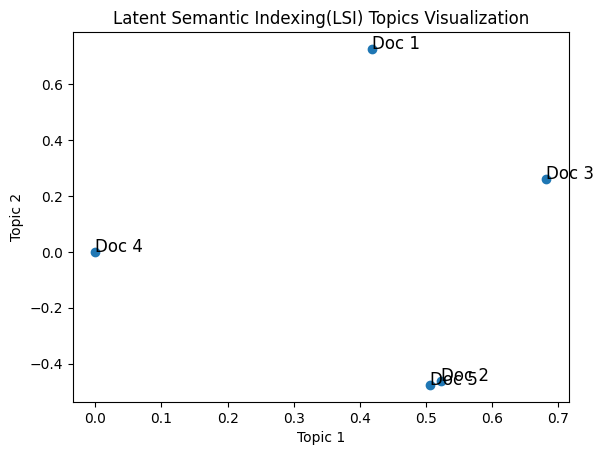

In [19]:
import matplotlib.pyplot as plt

plt.scatter(lsi_matrix[:, 0], lsi_matrix[:,1])
for i , doc in enumerate(documents):
    plt.text(lsi_matrix[i,0],lsi_matrix[i,1],f"Doc {i + 1 }", fontsize = 12)

plt.title("Latent Semantic Indexing(LSI) Topics Visualization")
plt.xlabel("Topic 1")
plt.ylabel('Topic 2')
plt.show